<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/02_Production_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 18.9MB/s 
     |████████████████████████████████| 1.2MB 52.6MB/s 
     |████████████████████████████████| 194kB 55.8MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 245kB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
import shutil
from fastbook import *
from fastai.vision.widgets import *

https://forums.fast.ai/t/alternatives-to-bing-image-search/79753

In [4]:
!pip install -q jmd_imagescraper
from pathlib import Path
from jmd_imagescraper.core import *

In [5]:
root = Path().cwd()/"images"

In [6]:
cats = duckduckgo_search(root, "Cats", "cute kittens", max_results=100)
dogs = duckduckgo_search(root, "Dogs", "cute puppies", max_results=100)

Duckduckgo search: cute kittens


Duckduckgo search: cute puppies


In [7]:
len(cats)

100

In [8]:
im = Image.open(cats[0])

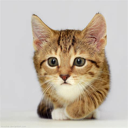

In [9]:
im.to_thumb(128, 128)

In [10]:
pet_types = "grizzly bear", "black bear"
path = Path().cwd()/"pets"

In [27]:
if path.exists():
    shutil.rmtree(path)

if not path.exists():
    path.mkdir()
    for o in pet_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = duckduckgo_search(path, o, o, max_results=100)

Duckduckgo search: grizzly bear


Exception occured while retrieving https://tse4.mm.bing.net/th?id=OIP.5z5YM4_5skA4tGTNRR72GgAAAA&pid=Api
Duckduckgo search: black bear


Exception occured while retrieving https://tse2.mm.bing.net/th?id=OIP.MROkauW4NFRr7KmF8RozBwHaHa&pid=Api


In [28]:
fns = get_image_files(path)
fns

(#198) [Path('/content/pets/black bear/078_0cd44eca.jpg'),Path('/content/pets/black bear/045_ab8a84c1.jpg'),Path('/content/pets/black bear/013_c2270b1a.jpg'),Path('/content/pets/black bear/041_05e87b31.jpg'),Path('/content/pets/black bear/087_f98c05b1.jpg'),Path('/content/pets/black bear/038_db40342b.jpg'),Path('/content/pets/black bear/046_68d75385.jpg'),Path('/content/pets/black bear/065_3f8bc814.jpg'),Path('/content/pets/black bear/073_469bec77.jpg'),Path('/content/pets/black bear/072_939847aa.jpg')...]

In [29]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
??verify_images

In [43]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [44]:
pets = pets.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pets.dataloaders(path)

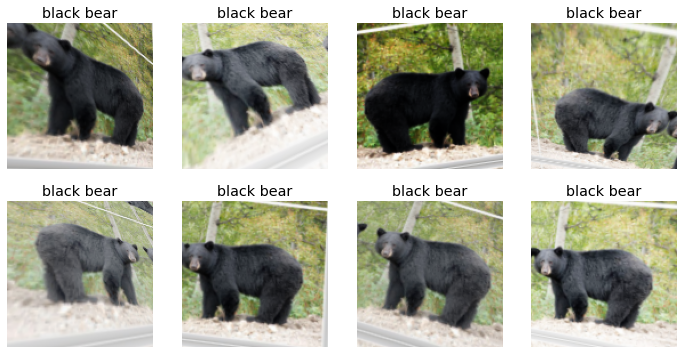

In [45]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [46]:
pets = pets.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pets.dataloaders(path)

In [47]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.058436,3.392155,0.447368,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.452503,1.882462,0.421053,00:01
1,0.379030,0.834741,0.315789,00:01
2,0.283482,0.368742,0.184211,00:01
3,0.226218,0.298534,0.105263,00:01


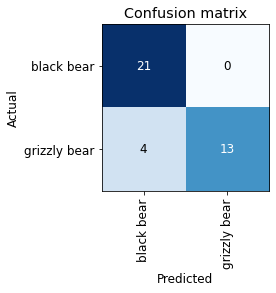

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

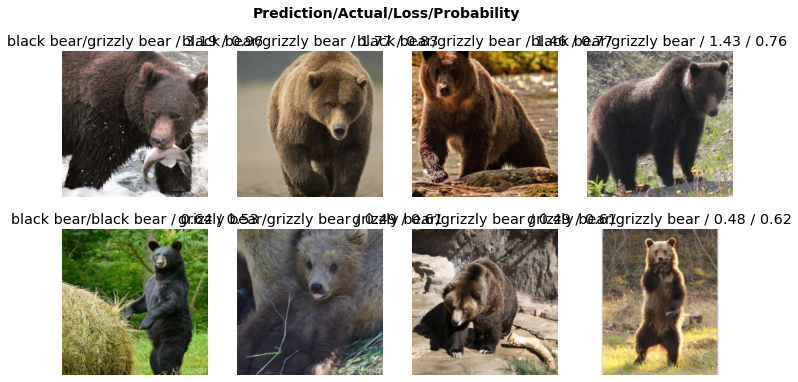

In [49]:
interp.plot_top_losses(8, nrows=2)

In [50]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [38]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [41]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()